목적 : 탐색적 데이터 분석 EDA
=====================
목표 : 기초통계량, 상관분석(+유의성 검정),Q-Qplot
-------------------------    

import modules

In [3]:
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

import platform
if platform.system() == "Darwin":           # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')


import scipy.stats as stats
from scipy.stats import shapiro, pearsonr
from itertools import combinations

환경설정

In [4]:
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

# pd.set_option('display.max_columns', None)
pd.reset_option('display.max_columns')

pd.set_option('display.max_seq_items', None)

pd.set_option('float_format', '{:.3f}'.format)

load file

In [5]:
df1 = pd.read_csv('.\비상장후보피처.csv', encoding='utf-8', index_col=0).dropna()

Data set

In [6]:
df1

,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,유동부채비율,...,경영자본회전률,총자본회전률,비유동자산회전률,유동자산회전률,영업년수,부실판단,도입기,성숙기,성장기,쇠퇴기
회사명,,,,,,,,,,,,,,,,,,,,,
주식회사성환,81567,2019,7.090,17.070,0.560,13.700,30.420,30.420,8.610,3.720,...,0.040,0.040,0.040,4.050,8.000,0.000,0,1,0,0
주식회사성후,86355,2022,8.060,22.990,5.920,80.120,211.530,211.530,276.770,5.520,...,0.080,0.080,0.090,2.340,7.000,0.000,0,0,1,0
주식회사성훈,94984,2021,-0.660,-0.690,-0.680,-13.770,9.300,9.230,0.000,0.000,...,0.050,0.050,0.050,1.250,5.000,1.000,1,0,0,0
주식회사성훈철강,56923,2022,23.220,30.130,7.230,12.350,65.240,50.340,45.270,38.800,...,1.140,0.610,0.730,3.570,29.000,0.000,0,1,0,0
주식회사성희,63893,2021,-11.770,-12.620,-8.050,-1202.080,141.010,3.010,216.010,200.290,...,0.010,0.010,0.080,0.010,20.000,1.000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
주식회사나노브릭,77738,2017,-14.230,-27.590,-13.900,-41.830,20.670,9.690,4278.150,2697.100,...,0.310,0.290,0.330,2.080,17.000,1.000,0,0,0,1
주식회사나노아,67623,2017,-153.850,0.000,-49.380,-934.360,313.180,313.180,47.270,46.300,...,0.020,0.020,0.020,0.100,14.000,0.000,0,0,0,1
주식회사나노앤텍,72817,2022,0.760,0.850,0.570,1.400,63.520,34.190,304.840,116.680,...,0.520,0.500,0.630,2.460,19.000,0.000,0,0,1,0


In [7]:
df1.isna().sum().sort_values(ascending=False)

거래소코드                0
유동자산증가율              0
매출액증가율               0
유형자산증가율              0
부가가치(백만원)            0
총자본투자효율              0
설비투자효율               0
부가가치율                0
이윤분배율                0
자본분배율                0
총자산회전율               0
매출채권회전률              0
당좌자산회전률              0
유형자산회전율              0
경영자본회전률              0
총자본회전률               0
비유동자산회전률             0
유동자산회전률              0
영업년수                 0
부실판단                 0
도입기                  0
성숙기                  0
성장기                  0
비유동자산증가율             0
총자본증가율               0
회계년도                 0
총자산증가율               0
CASH FLOW 대 부채비율     0
CASH FLOW 대 차입금비율    0
CASH FLOW 대 총자본비율    0
CASH FLOW 대 매출액비율    0
유동비율                 0
당좌비율                 0
부채비율                 0
유동부채비율               0
차입금의존도               0
순운전자본비율              0
현금비율                 0
유동자산구성비율             0
자기자본구성비율             0
자기자본순이익률             0
경영자본순이익률             0
매출액순이익률              0
총자본사업이익률   

In [8]:
# df1 = df1.rename(columns={'설립일': '영업년수',
#                         #    '상장일': '상장년수'
#                            })

# df1['영업년수'] = pd.to_datetime(df1['영업년수'])
# df1['영업년수'] = df1['영업년수'].dt.year
# df1['영업년수'] = 2024 - df1['영업년수']

# # df1['상장년수'] = pd.to_datetime(df1['상장년수'])
# # df1['상장년수'] = df1['상장년수'].dt.year
# # df1['상장년수'] = 2024 - df1['상장년수']

In [9]:
df1.columns

Index(['거래소코드', '회계년도', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율',
       'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율', '유동비율', '당좌비율', '부채비율',
       '유동부채비율', '차입금의존도', '순운전자본비율', '현금비율', '유동자산구성비율', '자기자본구성비율',
       '자기자본순이익률', '경영자본순이익률', '매출액순이익률', '총자본사업이익률', '총자본영업이익률', '매출액영업이익률',
       '금융비용부담률', 'CROE', '총자산증가율', '총자본증가율', '유동자산증가율', '비유동자산증가율', '매출액증가율',
       '유형자산증가율', '부가가치(백만원)', '총자본투자효율', '설비투자효율', '부가가치율', '이윤분배율', '자본분배율',
       '총자산회전율', '매출채권회전률', '당좌자산회전률', '유형자산회전율', '경영자본회전률', '총자본회전률',
       '비유동자산회전률', '유동자산회전률', '영업년수', '부실판단', '도입기', '성숙기', '성장기', '쇠퇴기'],
      dtype='object')

In [10]:
df1.describe()

,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,유동부채비율,...,경영자본회전률,총자본회전률,비유동자산회전률,유동자산회전률,영업년수,부실판단,도입기,성숙기,성장기,쇠퇴기
count,20707.000,20707.000,20707.000,20707.000,20707.000,20707.000,20707.000,20707.000,20707.000,20707.000,...,20707.000,20707.000,20707.000,20707.000,20707.000,20707.000,20707.000,20707.000,20707.000,20707.000
mean,67857.406,2019.860,20.564,2731.636,3.419,-21.564,398.208,326.402,1359.516,986.608,...,1.126,1.004,27.256,2.813,21.300,0.361,0.220,0.364,0.192,0.224
std,23591.297,2.807,1101.214,208063.234,40.960,501.996,4653.095,4534.588,32309.752,28022.274,...,1.584,1.415,737.051,4.841,11.205,0.480,0.414,0.481,0.394,0.417
min,10037.000,2014.000,-86467.650,-940370.860,-3388.620,-21110.050,0.050,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,52477.500,2018.000,-4.520,-5.170,-2.920,-4.930,56.235,31.605,60.850,36.800,...,0.340,0.280,0.490,1.060,13.000,0.000,0.000,0.000,0.000,0.000
50%,70861.000,2022.000,2.870,1.540,1.840,2.380,108.450,72.590,163.190,103.200,...,0.820,0.730,1.470,1.990,20.000,0.000,0.000,0.000,0.000,0.000
75%,87114.000,2022.000,14.505,17.420,7.430,10.670,198.350,150.505,371.640,238.110,...,1.440,1.300,3.790,3.320,27.000,1.000,0.000,1.000,0.000,0.000
max,101635.000,2022.000,113999.840,27854555.600,3157.270,21579.540,447760.110,447760.110,3385006.150,2905990.690,...,106.800,92.050,93448.220,344.060,113.000,1.000,1.000,1.000,1.000,1.000


In [11]:
df1.isin([0]).sum().sort_values(ascending=False)

성장기                  16721
도입기                  16157
쇠퇴기                  16073
부실판단                 13225
성숙기                  13170
CROE                  2555
자본분배율                 2209
이윤분배율                 1921
총자산회전율                1855
총자산증가율                1854
차입금의존도                1752
CASH FLOW 대 차입금비율     1743
매출채권회전률               1621
자기자본순이익률              1053
자기자본구성비율               831
유동부채비율                 829
부채비율                   829
유형자산증가율                469
설비투자효율                 292
유형자산회전율                253
매출액증가율                 204
현금비율                   123
금융비용부담률                109
총자본회전률                  70
비유동자산증가율                62
경영자본회전률                 47
비유동자산회전률                35
영업년수                    21
유동자산회전률                 17
총자본증가율                  12
총자본사업이익률                10
CASH FLOW 대 매출액비율       10
CASH FLOW 대 총자본비율        9
매출액영업이익률                 9
총자본영업이익률                 9
경영자본순이익률                 9
CASH FLOW 대 부채비율         6
매

drop outlier

In [12]:
import pandas as pd
import numpy as np

def remove_outliers_df(df, columns, threshold=1.5):
    """
    DataFrame에 있는 열들에 대해 IQR을 사용하여 이상치를 제거하는 함수

    Parameters:
    - df: 이상치를 제거할 DataFrame
    - columns: 이상치를 제거할 열의 리스트
    - threshold: 이상치를 정의하는 IQR의 배수, 기본값은 1.5

    Returns:
    - 이상치가 제거된 DataFrame
    """
    # 이상치 제거를 위한 함수
    def remove_outliers(column):
        sorted_data = np.sort(column)
        q1, q3 = np.percentile(sorted_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        return column[(column >= lower_bound) & (column <= upper_bound)]

    # DataFrame 복사
    df_copy = df.copy()

    # 각 열에 대해 이상치 제거 함수 적용
    for column in columns:
        df_copy[column] = remove_outliers(df[column])

    return df_copy

In [13]:
filtered_df = remove_rows_with_outliers(df1, df1.columns)

NameError: name 'remove_rows_with_outliers' is not defined

In [2]:
len(filtered_df)

NameError: name 'filtered_df' is not defined

범주 분할 1현금흐름 / 2안정성 / 2수익성 / 3유동성 / 4성장성 / 5생산성 / 6활동성 / 7기타

In [64]:
df1.columns

Index(['거래소코드', '회계년도', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율',
       'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율', '유동비율', '당좌비율', '부채비율',
       '유동부채비율', '차입금의존도', '순운전자본비율', '현금비율', '유동자산구성비율', '자기자본구성비율',
       '자기자본순이익률', '경영자본순이익률', '매출액순이익률', '총자본사업이익률', '총자본영업이익률', '매출액영업이익률',
       '금융비용부담률', 'CROE', '총자산증가율', '총자본증가율', '유동자산증가율', '비유동자산증가율', '매출액증가율',
       '유형자산증가율', '부가가치(백만원)', '총자본투자효율', '설비투자효율', '부가가치율', '이윤분배율', '자본분배율',
       '총자산회전율', '매출채권회전률', '당좌자산회전률', '유형자산회전율', '경영자본회전률', '총자본회전률',
       '비유동자산회전률', '유동자산회전률', '영업년수', '부실판단', '도입기', '성숙기', '성장기', '쇠퇴기'],
      dtype='object')

In [65]:
# 비상장 all data는 df1
# 비상장 label들

labels = df1[
    [
        '거래소코드',
        '회계년도',
        '부실판단',
        '도입기',
        '성숙기',
        '성장기',
        '쇠퇴기'
    ]
]

# 비상장 피처
features = df1.drop(
    labels=[
        '거래소코드',
        '회계년도',
        '도입기',
        '성숙기',
        '성장기',
        '쇠퇴기'
    ],
    axis=1,    
)

# 현금흐름 4개
cash_ft1 = df1[
    [
        'CASH FLOW 대 부채비율',
        'CASH FLOW 대 차입금비율',
        'CASH FLOW 대 총자본비율',
        'CASH FLOW 대 매출액비율',
        '부실판단'
    ]
]

# 안정성 10개
stability_ft1 = df1[
    [
        '유동비율',
        '당좌비율',
        '부채비율',
        '유동부채비율',
        '차입금의존도',
        '순운전자본비율',
        '현금비율',
        '유동자산구성비율',
        '자기자본구성비율',
        '부실판단'
    ]
]

# 수익성 10개
profitability_ft1 = df1[
    [
        '자기자본순이익률',
        '경영자본순이익률',
        '매출액순이익률',
        '총자본사업이익률',
        '총자본영업이익률',
        '매출액영업이익률',
        '금융비용부담률',
        'CROE',
        '부실판단'
    ]
]

# 성장성 8개
growth_ft1 = df1[
    [
        '총자산증가율',
        '총자본증가율',
        '유동자산증가율',
        '비유동자산증가율',
        '매출액증가율',
        '유형자산증가율',
        '부실판단'
    ]
]

# 생산성 5개
productivity_ft1 = df1[
    [
        '부가가치(백만원)',
        '총자본투자효율',
        '설비투자효율',
        '부가가치율',
        '이윤분배율',
        '자본분배율',
        '부실판단'
    ]
]

# 활동성 10개
activity_ft1 = df1[
    [
        '총자산회전율',
        '매출채권회전률',
        '당좌자산회전률',
        '유형자산회전율',
        '경영자본회전률',
        '총자본회전률',
        '비유동자산회전률',
        '유동자산회전률',
        '부실판단'
    ]
]

# 시장지표 및 기타
etc_ft1 = df1[
    [
        '영업년수',
        '도입기',
        '성숙기',
        '성장기',
        '쇠퇴기',
        '부실판단'
    ]
]

In [66]:
df1_ft = [cash_ft1, stability_ft1, profitability_ft1, growth_ft1, productivity_ft1, activity_ft1]

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20707 entries, 주식회사성환 to 주식회사나노팜
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   거래소코드              20707 non-null  int64  
 1   회계년도               20707 non-null  int64  
 2   CASH FLOW 대 부채비율   20707 non-null  float64
 3   CASH FLOW 대 차입금비율  20707 non-null  float64
 4   CASH FLOW 대 총자본비율  20707 non-null  float64
 5   CASH FLOW 대 매출액비율  20707 non-null  float64
 6   유동비율               20707 non-null  float64
 7   당좌비율               20707 non-null  float64
 8   부채비율               20707 non-null  float64
 9   유동부채비율             20707 non-null  float64
 10  차입금의존도             20707 non-null  float64
 11  순운전자본비율            20707 non-null  float64
 12  현금비율               20707 non-null  float64
 13  유동자산구성비율           20707 non-null  float64
 14  자기자본구성비율           20707 non-null  float64
 15  자기자본순이익률           20707 non-null  float64
 16  경영자본순이익률           2

In [68]:
df1

,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,유동부채비율,...,경영자본회전률,총자본회전률,비유동자산회전률,유동자산회전률,영업년수,부실판단,도입기,성숙기,성장기,쇠퇴기
회사명,,,,,,,,,,,,,,,,,,,,,
주식회사성환,81567,2019,7.090,17.070,0.560,13.700,30.420,30.420,8.610,3.720,...,0.040,0.040,0.040,4.050,8.000,0.000,0,1,0,0
주식회사성후,86355,2022,8.060,22.990,5.920,80.120,211.530,211.530,276.770,5.520,...,0.080,0.080,0.090,2.340,7.000,0.000,0,0,1,0
주식회사성훈,94984,2021,-0.660,-0.690,-0.680,-13.770,9.300,9.230,0.000,0.000,...,0.050,0.050,0.050,1.250,5.000,1.000,1,0,0,0
주식회사성훈철강,56923,2022,23.220,30.130,7.230,12.350,65.240,50.340,45.270,38.800,...,1.140,0.610,0.730,3.570,29.000,0.000,0,1,0,0
주식회사성희,63893,2021,-11.770,-12.620,-8.050,-1202.080,141.010,3.010,216.010,200.290,...,0.010,0.010,0.080,0.010,20.000,1.000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
주식회사나노브릭,77738,2017,-14.230,-27.590,-13.900,-41.830,20.670,9.690,4278.150,2697.100,...,0.310,0.290,0.330,2.080,17.000,1.000,0,0,0,1
주식회사나노아,67623,2017,-153.850,0.000,-49.380,-934.360,313.180,313.180,47.270,46.300,...,0.020,0.020,0.020,0.100,14.000,0.000,0,0,0,1
주식회사나노앤텍,72817,2022,0.760,0.850,0.570,1.400,63.520,34.190,304.840,116.680,...,0.520,0.500,0.630,2.460,19.000,0.000,0,0,1,0


In [69]:
# def qq_plot(df):
#     # 모든 칼럼 순회
#     for col in df.columns:
#         # Q-Q plot 그리기
#         stats.probplot(df[col], dist="norm", plot=plt)
#         plt.title(f"Q-Q plot for {col}")
#         plt.show()


# Q-Qplot

In [70]:
def qq_plot(df):
    fig, axes = plt.subplots(13, 5, figsize=(15, 30))
    fig.subplots_adjust(wspace=0.5, hspace=0.5)  # 서브플롯 간 간격 조정
    
    for i in range(13):
        for j in range(5):
            col_index = i * 5 + j
            if col_index < len(df.columns):
                # Q-Q plot 그리기
                stats.probplot(df[df.columns[col_index]], dist="norm", plot=axes[i, j])
                axes[i, j].set_title(f"{df.columns[col_index]}")
            else:
                # 데이터프레임 칼럼 수보다 많은 서브플롯은 숨김
                axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

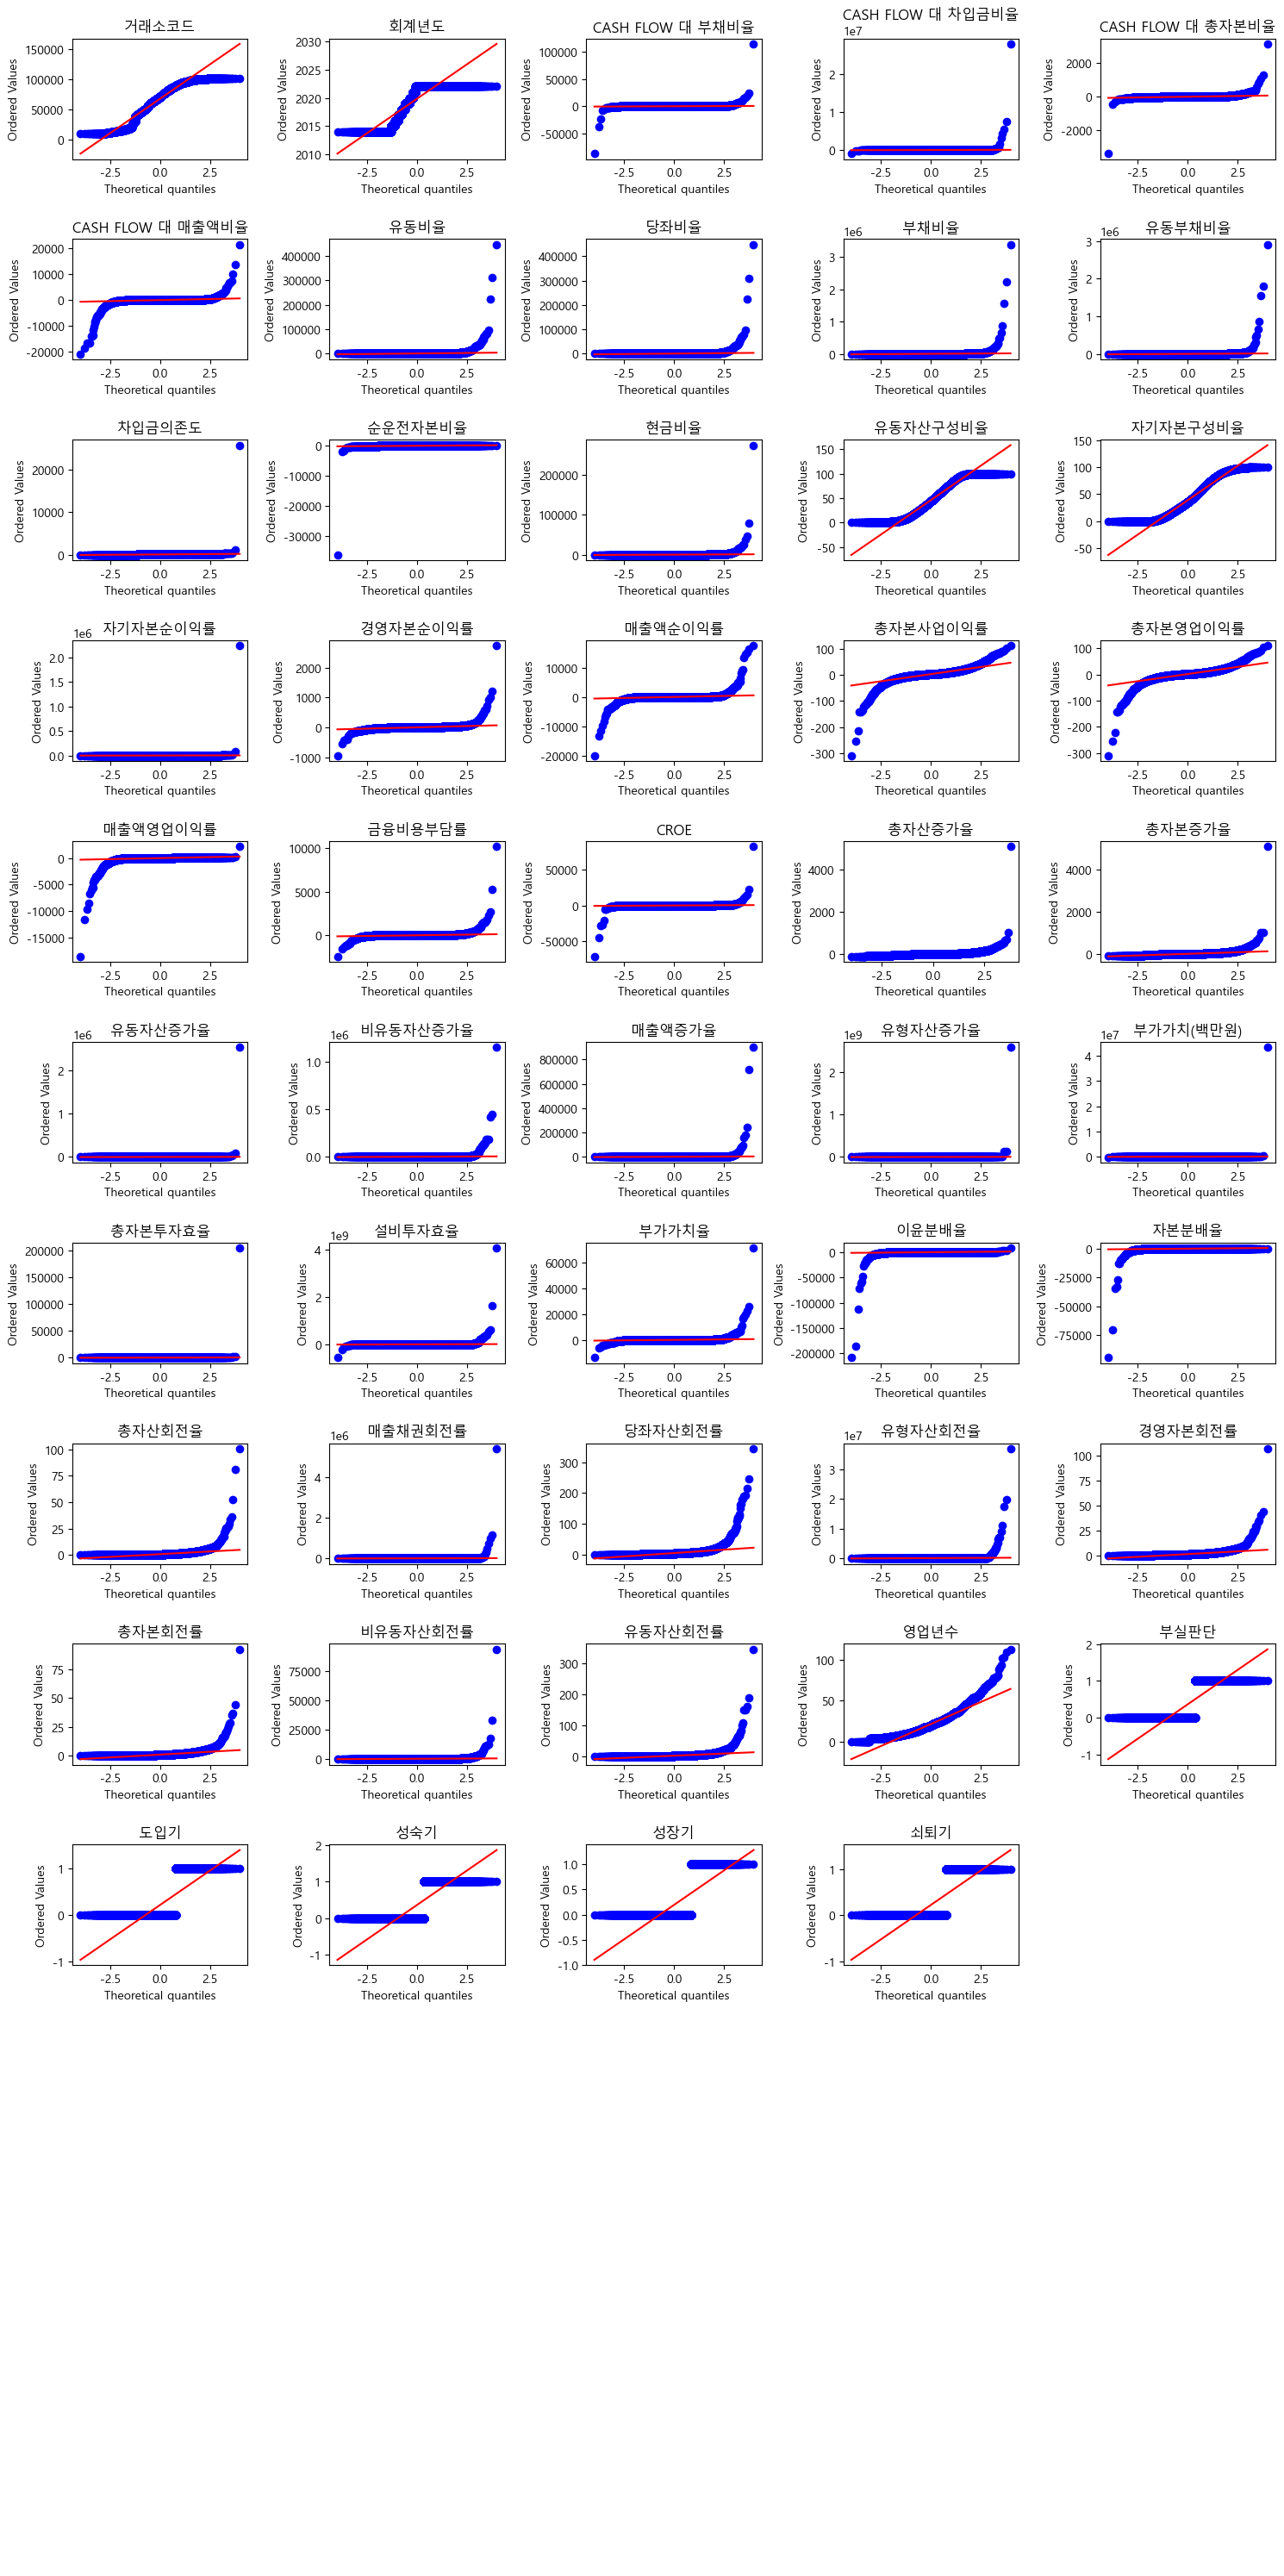

In [71]:
qq_plot(df1)

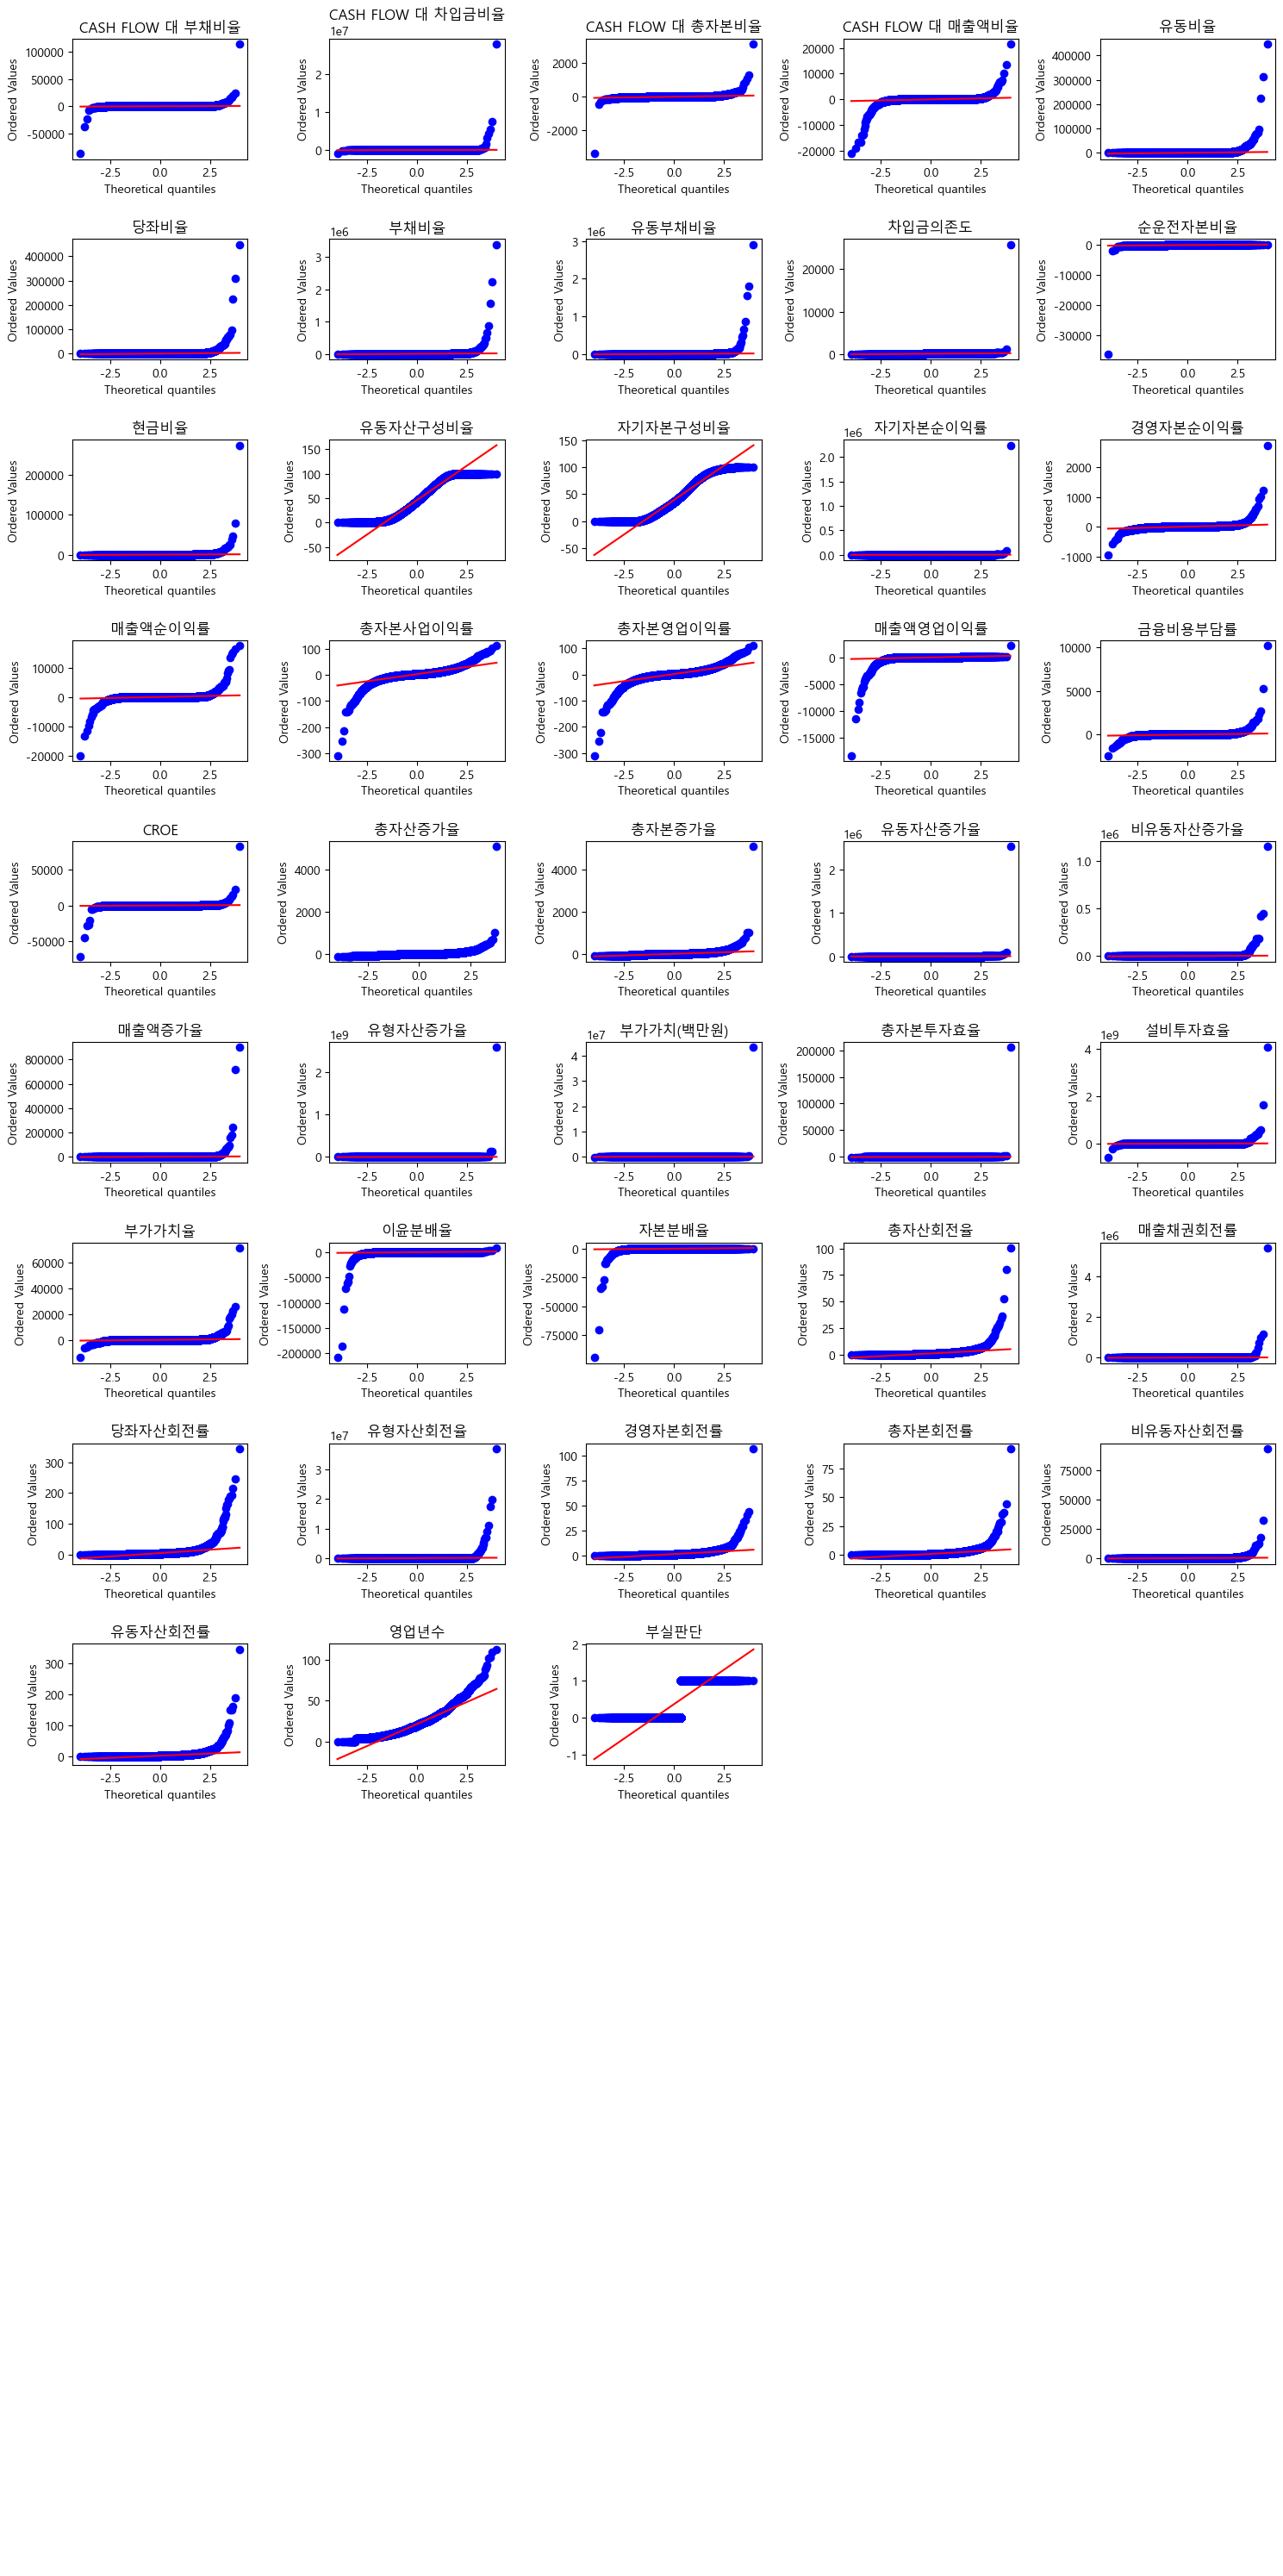

In [72]:
qq_plot(features)

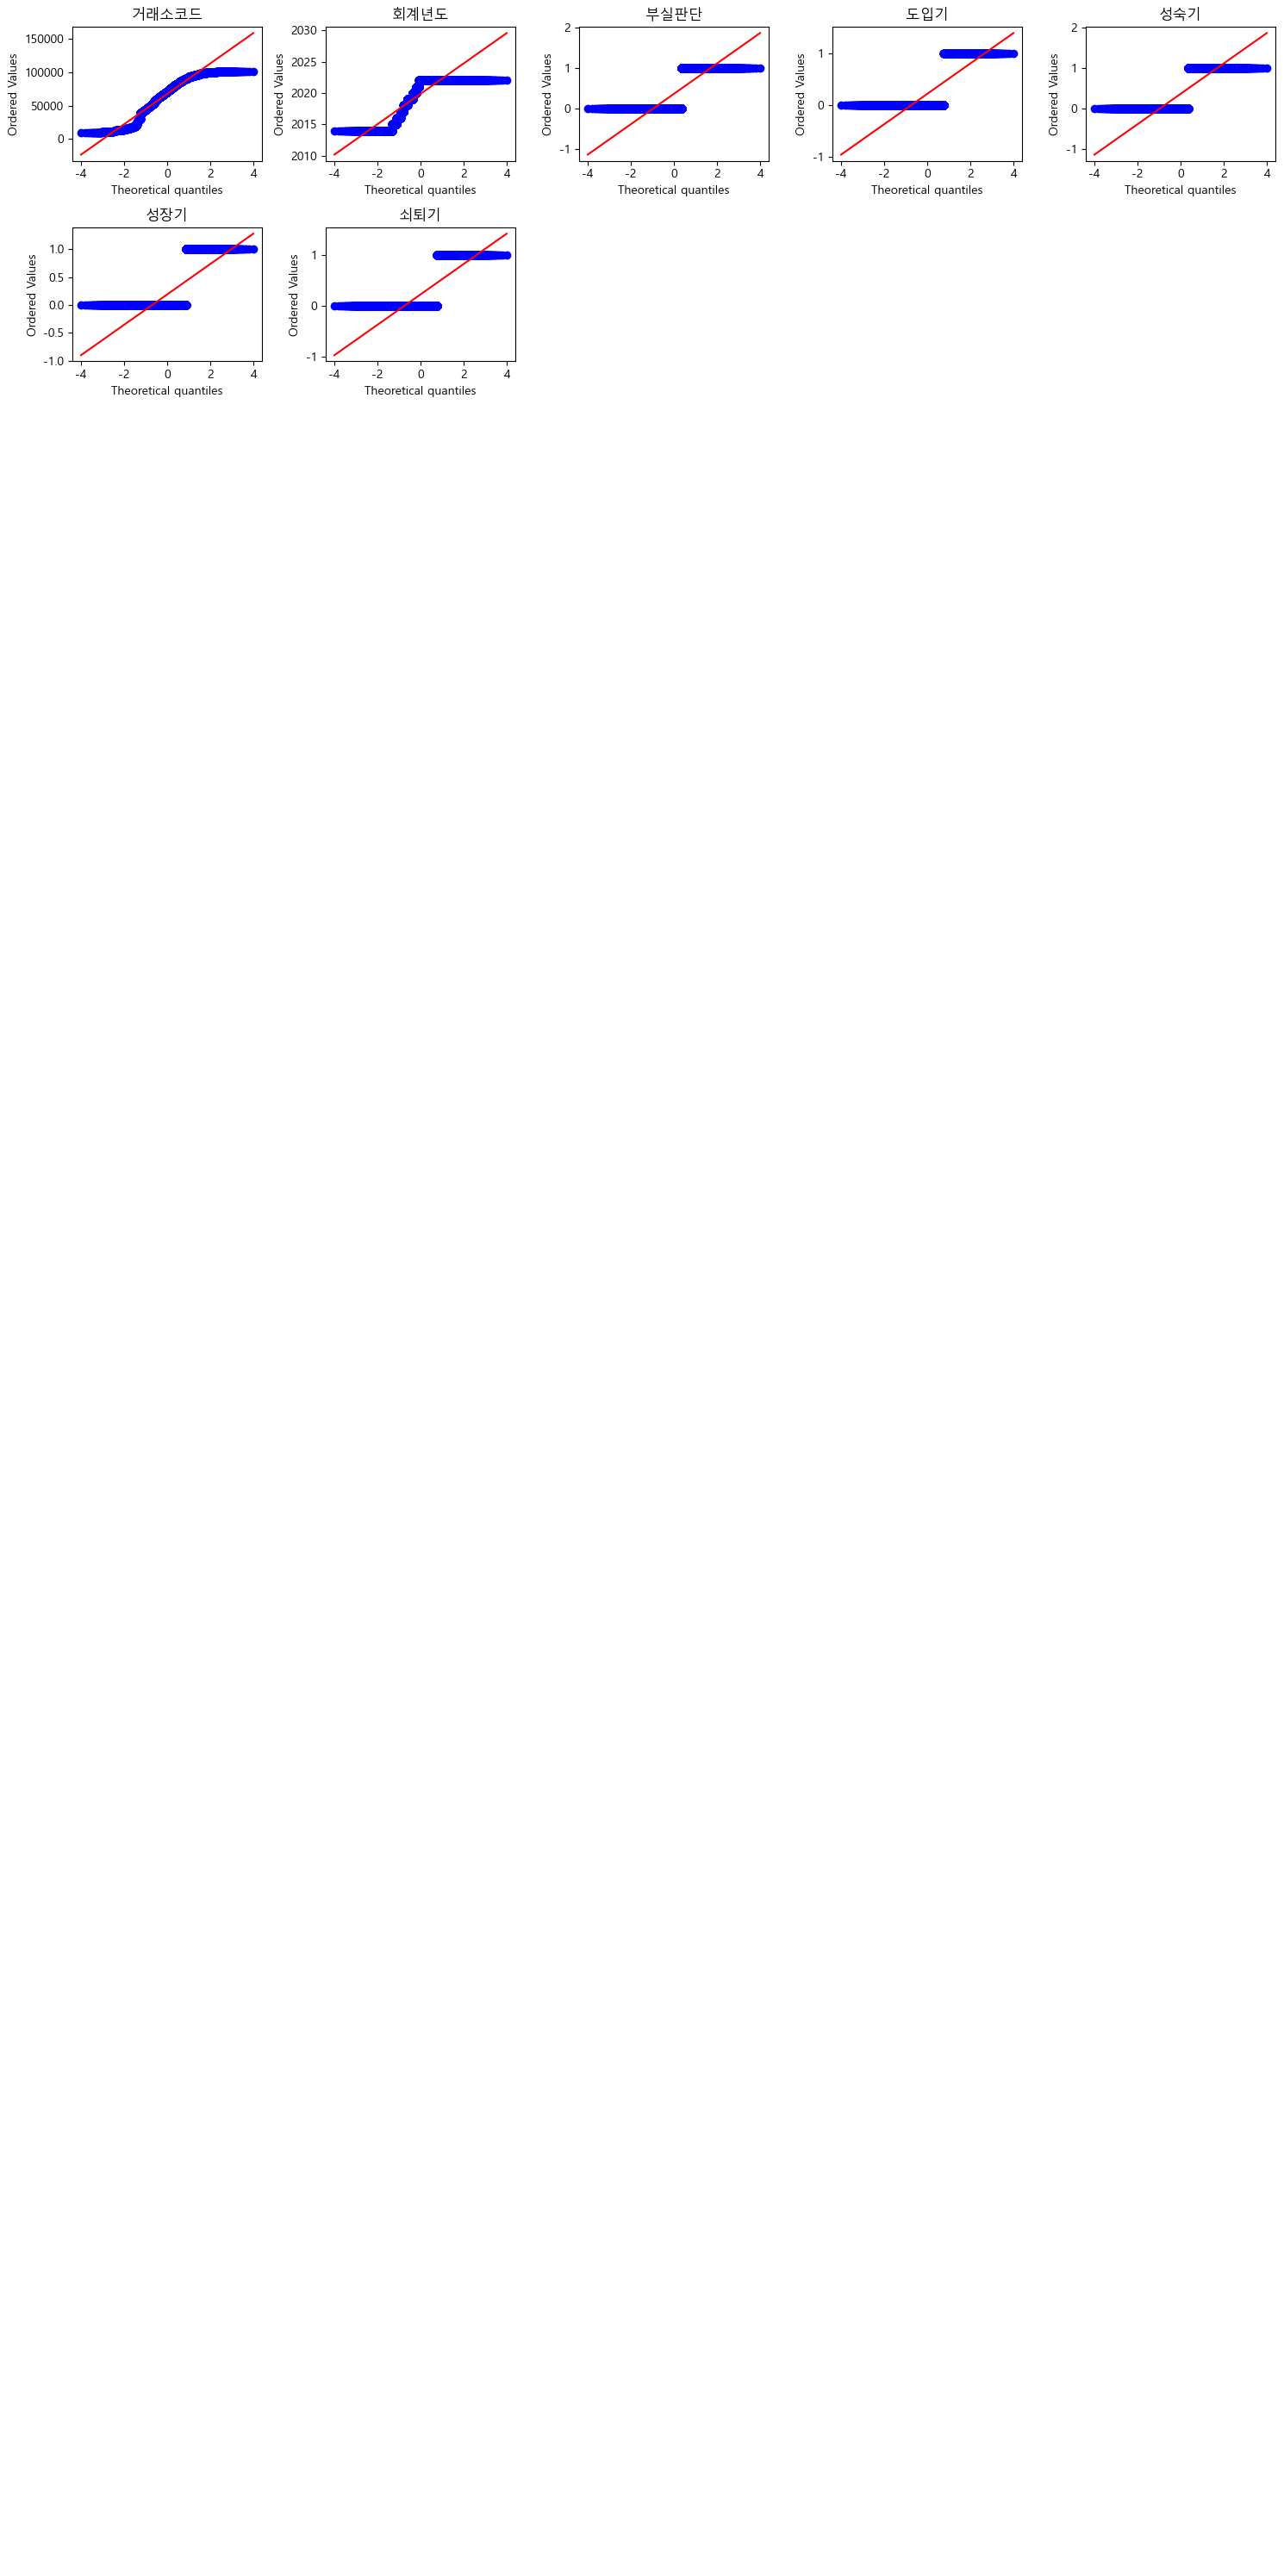

In [73]:
qq_plot(labels)

# 상관계수와 유의성 검정

In [74]:
# 상관 계수와 p-value 계산하는 함수
def correlation_and_pval(df):
    columns = df.columns
    corr_dict = {}
    pval_dict = {}
    
    # 모든 특성 쌍에 대한 상관 계수와 p-value 계산
    for col1, col2 in combinations(columns, 2):
        corr, pval = pearsonr(df[col1], df[col2])
        corr_dict[f"{col1}-{col2}"] = corr
        pval_dict[f"{col1}-{col2}"] = pval
    
    return corr_dict, pval_dict

1현금흐름

<Axes: >

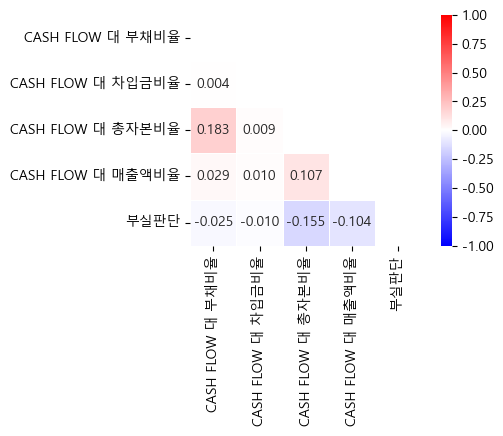

In [75]:
plt.figure(figsize=(5,3))
mask = np.triu(np.ones_like(cash_ft1.corr(), dtype=bool))
sns.heatmap(cash_ft1.corr(),
            vmax=1,
            vmin=-1,
            # center=0,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='bwr', 
            linewidths=.5, 
            mask = mask) # 좌하방만 표시

In [76]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(cash_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
CASH FLOW 대 부채비율-CASH FLOW 대 차입금비율: 0.004
CASH FLOW 대 부채비율-CASH FLOW 대 총자본비율: 0.183
CASH FLOW 대 부채비율-CASH FLOW 대 매출액비율: 0.029
CASH FLOW 대 부채비율-부실판단: -0.025
CASH FLOW 대 차입금비율-CASH FLOW 대 총자본비율: 0.009
CASH FLOW 대 차입금비율-CASH FLOW 대 매출액비율: 0.010
CASH FLOW 대 차입금비율-부실판단: -0.010
CASH FLOW 대 총자본비율-CASH FLOW 대 매출액비율: 0.107
CASH FLOW 대 총자본비율-부실판단: -0.155
CASH FLOW 대 매출액비율-부실판단: -0.104
p-value======================
CASH FLOW 대 부채비율-CASH FLOW 대 차입금비율: 0.612
CASH FLOW 대 부채비율-CASH FLOW 대 총자본비율: 0.000
CASH FLOW 대 부채비율-CASH FLOW 대 매출액비율: 0.000
CASH FLOW 대 부채비율-부실판단: 0.000
CASH FLOW 대 차입금비율-CASH FLOW 대 총자본비율: 0.219
CASH FLOW 대 차입금비율-CASH FLOW 대 매출액비율: 0.149
CASH FLOW 대 차입금비율-부실판단: 0.131
CASH FLOW 대 총자본비율-CASH FLOW 대 매출액비율: 0.000
CASH FLOW 대 총자본비율-부실판단: 0.000
CASH FLOW 대 매출액비율-부실판단: 0.000


In [77]:
np.abs(cash_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단                1.000
CASH FLOW 대 총자본비율   0.155
CASH FLOW 대 매출액비율   0.104
CASH FLOW 대 부채비율    0.025
CASH FLOW 대 차입금비율   0.010
Name: 부실판단, dtype: float64

2안정성

<Axes: >

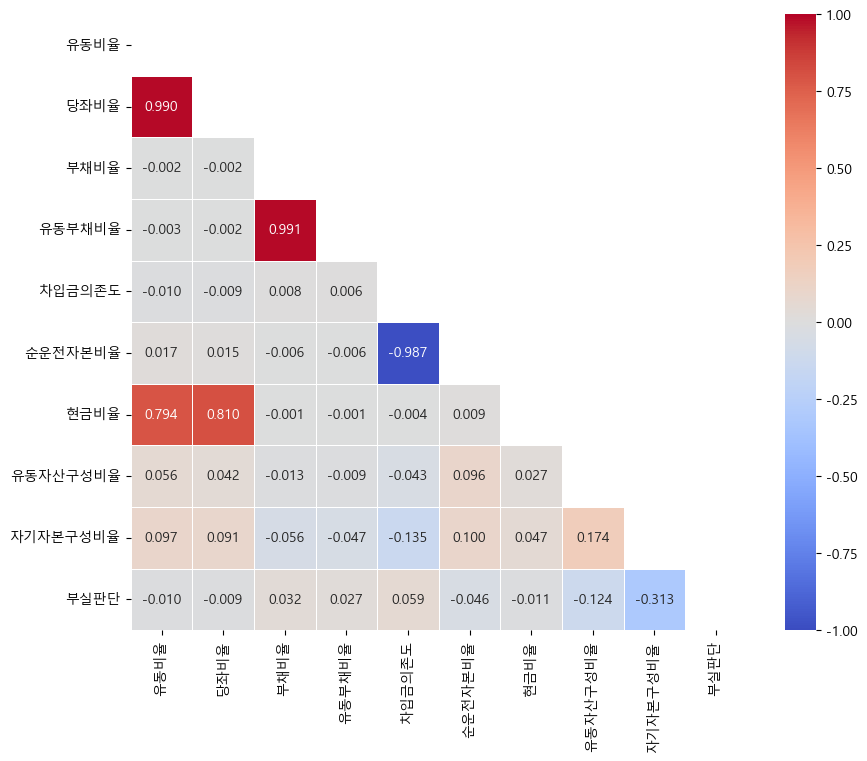

In [78]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(stability_ft1.corr(), dtype=bool))
sns.heatmap(stability_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask)

<Axes: >

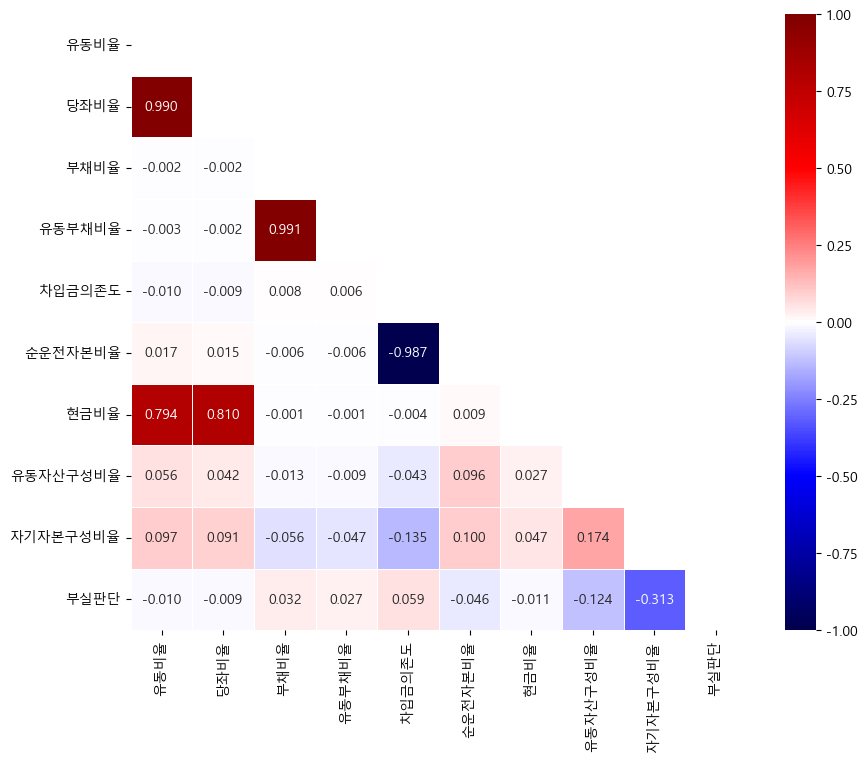

In [79]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(stability_ft1.corr(), dtype=bool))
sns.heatmap(stability_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='seismic', 
            linewidths=.5, 
            mask = mask)

<Axes: >

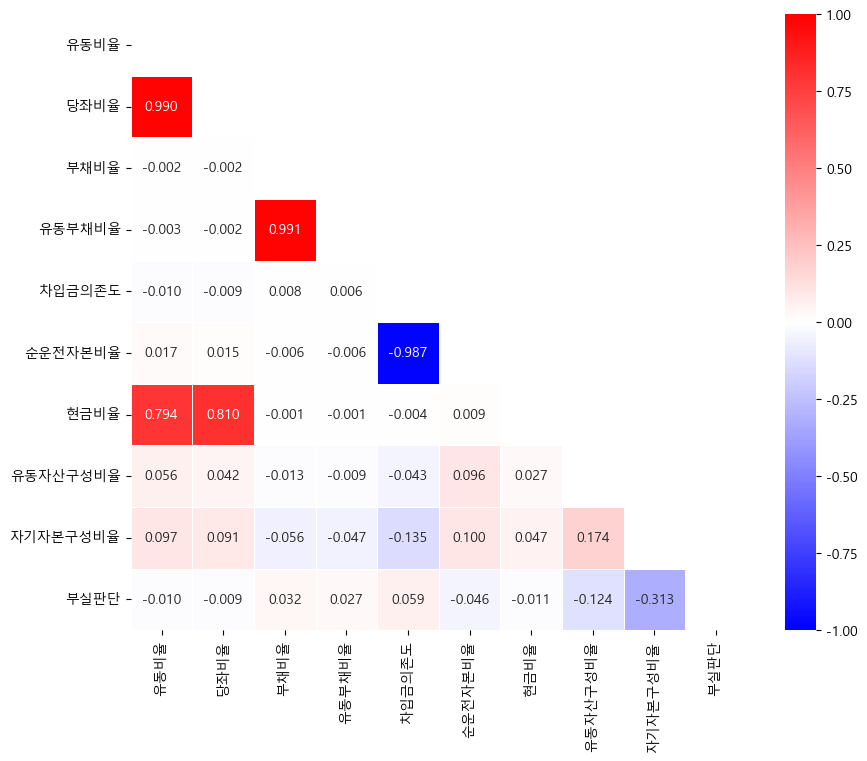

In [80]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(stability_ft1.corr(), dtype=bool))
sns.heatmap(stability_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='bwr', 
            linewidths=.5, 
            mask = mask)

In [81]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(stability_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
유동비율-당좌비율: 0.990
유동비율-부채비율: -0.002
유동비율-유동부채비율: -0.003
유동비율-차입금의존도: -0.010
유동비율-순운전자본비율: 0.017
유동비율-현금비율: 0.794
유동비율-유동자산구성비율: 0.056
유동비율-자기자본구성비율: 0.097
유동비율-부실판단: -0.010
당좌비율-부채비율: -0.002
당좌비율-유동부채비율: -0.002
당좌비율-차입금의존도: -0.009
당좌비율-순운전자본비율: 0.015
당좌비율-현금비율: 0.810
당좌비율-유동자산구성비율: 0.042
당좌비율-자기자본구성비율: 0.091
당좌비율-부실판단: -0.009
부채비율-유동부채비율: 0.991
부채비율-차입금의존도: 0.008
부채비율-순운전자본비율: -0.006
부채비율-현금비율: -0.001
부채비율-유동자산구성비율: -0.013
부채비율-자기자본구성비율: -0.056
부채비율-부실판단: 0.032
유동부채비율-차입금의존도: 0.006
유동부채비율-순운전자본비율: -0.006
유동부채비율-현금비율: -0.001
유동부채비율-유동자산구성비율: -0.009
유동부채비율-자기자본구성비율: -0.047
유동부채비율-부실판단: 0.027
차입금의존도-순운전자본비율: -0.987
차입금의존도-현금비율: -0.004
차입금의존도-유동자산구성비율: -0.043
차입금의존도-자기자본구성비율: -0.135
차입금의존도-부실판단: 0.059
순운전자본비율-현금비율: 0.009
순운전자본비율-유동자산구성비율: 0.096
순운전자본비율-자기자본구성비율: 0.100
순운전자본비율-부실판단: -0.046
현금비율-유동자산구성비율: 0.027
현금비율-자기자본구성비율: 0.047
현금비율-부실판단: -0.011
유동자산구성비율-자기자본구성비율: 0.174
유동자산구성비율-부실판단: -0.124
자기자본구성비율-부실판단: -0.313
p-value======================
유동비율-당좌비율: 0.000
유

In [82]:
np.abs(stability_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단       1.000
자기자본구성비율   0.313
유동자산구성비율   0.124
차입금의존도     0.059
순운전자본비율    0.046
부채비율       0.032
유동부채비율     0.027
현금비율       0.011
유동비율       0.010
당좌비율       0.009
Name: 부실판단, dtype: float64

3수익성

<Axes: >

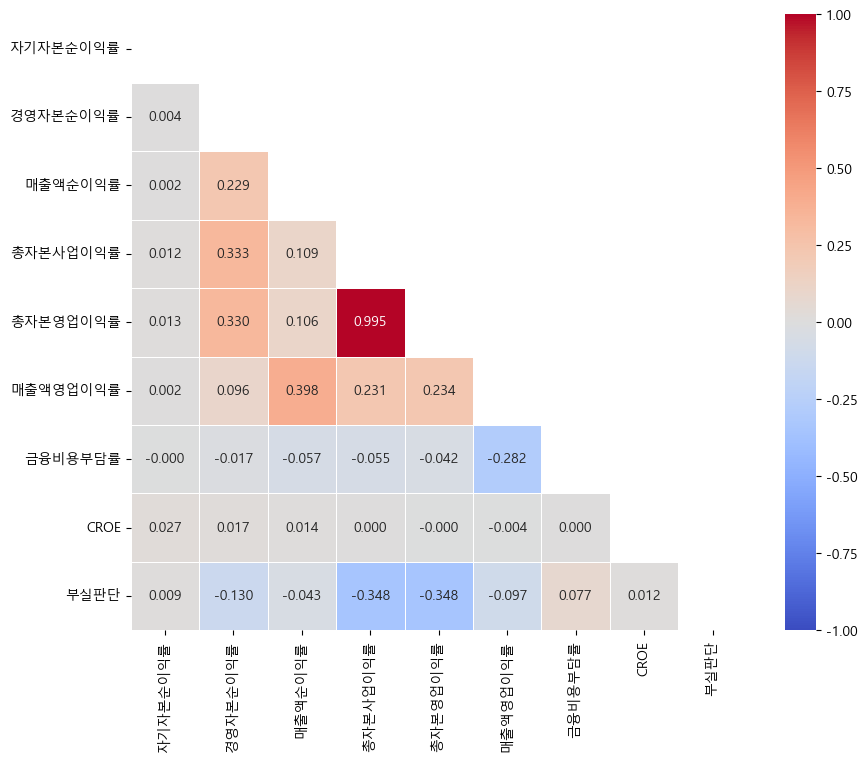

In [83]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(profitability_ft1.corr(), dtype=bool))
sns.heatmap(profitability_ft1.corr(),
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask)

In [84]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(profitability_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
자기자본순이익률-경영자본순이익률: 0.004
자기자본순이익률-매출액순이익률: 0.002
자기자본순이익률-총자본사업이익률: 0.012
자기자본순이익률-총자본영업이익률: 0.013
자기자본순이익률-매출액영업이익률: 0.002
자기자본순이익률-금융비용부담률: -0.000
자기자본순이익률-CROE: 0.027
자기자본순이익률-부실판단: 0.009
경영자본순이익률-매출액순이익률: 0.229
경영자본순이익률-총자본사업이익률: 0.333
경영자본순이익률-총자본영업이익률: 0.330
경영자본순이익률-매출액영업이익률: 0.096
경영자본순이익률-금융비용부담률: -0.017
경영자본순이익률-CROE: 0.017
경영자본순이익률-부실판단: -0.130
매출액순이익률-총자본사업이익률: 0.109
매출액순이익률-총자본영업이익률: 0.106
매출액순이익률-매출액영업이익률: 0.398
매출액순이익률-금융비용부담률: -0.057
매출액순이익률-CROE: 0.014
매출액순이익률-부실판단: -0.043
총자본사업이익률-총자본영업이익률: 0.995
총자본사업이익률-매출액영업이익률: 0.231
총자본사업이익률-금융비용부담률: -0.055
총자본사업이익률-CROE: 0.000
총자본사업이익률-부실판단: -0.348
총자본영업이익률-매출액영업이익률: 0.234
총자본영업이익률-금융비용부담률: -0.042
총자본영업이익률-CROE: -0.000
총자본영업이익률-부실판단: -0.348
매출액영업이익률-금융비용부담률: -0.282
매출액영업이익률-CROE: -0.004
매출액영업이익률-부실판단: -0.097
금융비용부담률-CROE: 0.000
금융비용부담률-부실판단: 0.077
CROE-부실판단: 0.012
p-value======================
자기자본순이익률-경영자본순이익률: 0.538
자기자본순이익률-매출액순이익률: 0.829
자기자본순이익률-총자본사업이익률: 0.077
자기자본순이익률-총자본영업이익률: 0.071
자기자본순이익률-매

In [85]:
np.abs(profitability_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단       1.000
총자본영업이익률   0.348
총자본사업이익률   0.348
경영자본순이익률   0.130
매출액영업이익률   0.097
금융비용부담률    0.077
매출액순이익률    0.043
CROE       0.012
자기자본순이익률   0.009
Name: 부실판단, dtype: float64

4유동성

In [91]:
growth_ft2 = growth_ft1.drop(growth_ft1[growth_ft1['총자산증가율'] == np.inf].index, axis=0)

<Axes: >

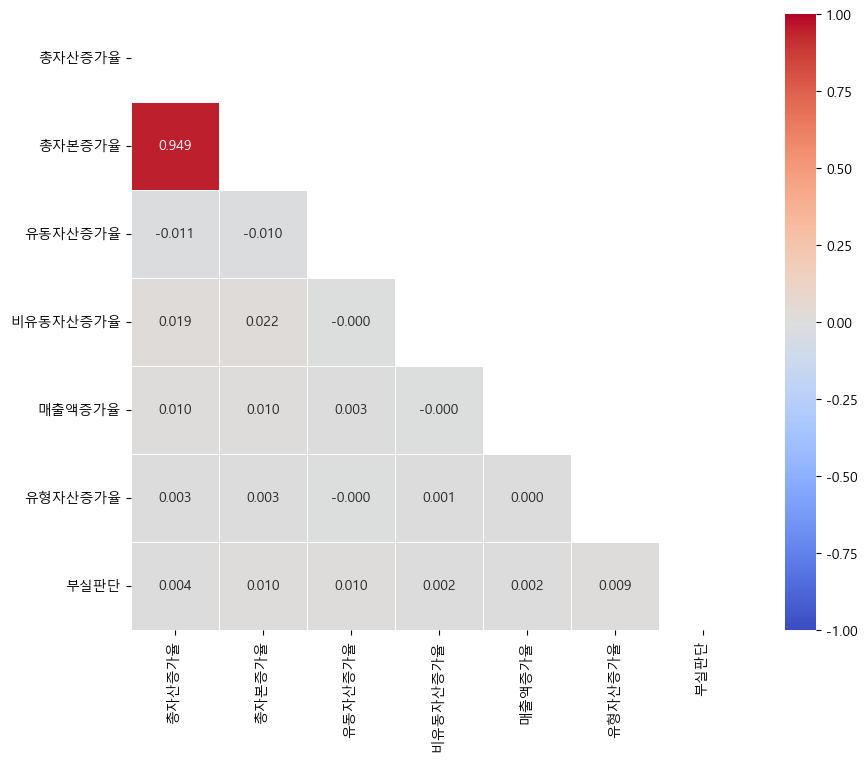

In [92]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(growth_ft2.corr(), dtype=bool))
sns.heatmap(growth_ft2.corr(),
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask)

In [93]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(growth_ft2)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
총자산증가율-총자본증가율: 0.949
총자산증가율-유동자산증가율: -0.011
총자산증가율-비유동자산증가율: 0.019
총자산증가율-매출액증가율: 0.010
총자산증가율-유형자산증가율: 0.003
총자산증가율-부실판단: 0.004
총자본증가율-유동자산증가율: -0.010
총자본증가율-비유동자산증가율: 0.022
총자본증가율-매출액증가율: 0.010
총자본증가율-유형자산증가율: 0.003
총자본증가율-부실판단: 0.010
유동자산증가율-비유동자산증가율: -0.000
유동자산증가율-매출액증가율: 0.003
유동자산증가율-유형자산증가율: -0.000
유동자산증가율-부실판단: 0.010
비유동자산증가율-매출액증가율: -0.000
비유동자산증가율-유형자산증가율: 0.001
비유동자산증가율-부실판단: 0.002
매출액증가율-유형자산증가율: 0.000
매출액증가율-부실판단: 0.002
유형자산증가율-부실판단: 0.009
p-value======================
총자산증가율-총자본증가율: 0.000
총자산증가율-유동자산증가율: 0.123
총자산증가율-비유동자산증가율: 0.007
총자산증가율-매출액증가율: 0.166
총자산증가율-유형자산증가율: 0.680
총자산증가율-부실판단: 0.594
총자본증가율-유동자산증가율: 0.145
총자본증가율-비유동자산증가율: 0.002
총자본증가율-매출액증가율: 0.165
총자본증가율-유형자산증가율: 0.686
총자본증가율-부실판단: 0.170
유동자산증가율-비유동자산증가율: 0.952
유동자산증가율-매출액증가율: 0.634
유동자산증가율-유형자산증가율: 0.993
유동자산증가율-부실판단: 0.148
비유동자산증가율-매출액증가율: 0.999
비유동자산증가율-유형자산증가율: 0.893
비유동자산증가율-부실판단: 0.791
매출액증가율-유형자산증가율: 0.994
매출액증가율-부실판단: 0.736
유형자산증가율-부실판단: 0.173


In [95]:
np.abs(growth_ft2.corr()['부실판단']).sort_values(ascending=False)

부실판단       1.000
유동자산증가율    0.010
총자본증가율     0.010
유형자산증가율    0.009
총자산증가율     0.004
매출액증가율     0.002
비유동자산증가율   0.002
Name: 부실판단, dtype: float64

5생산성

<Axes: >

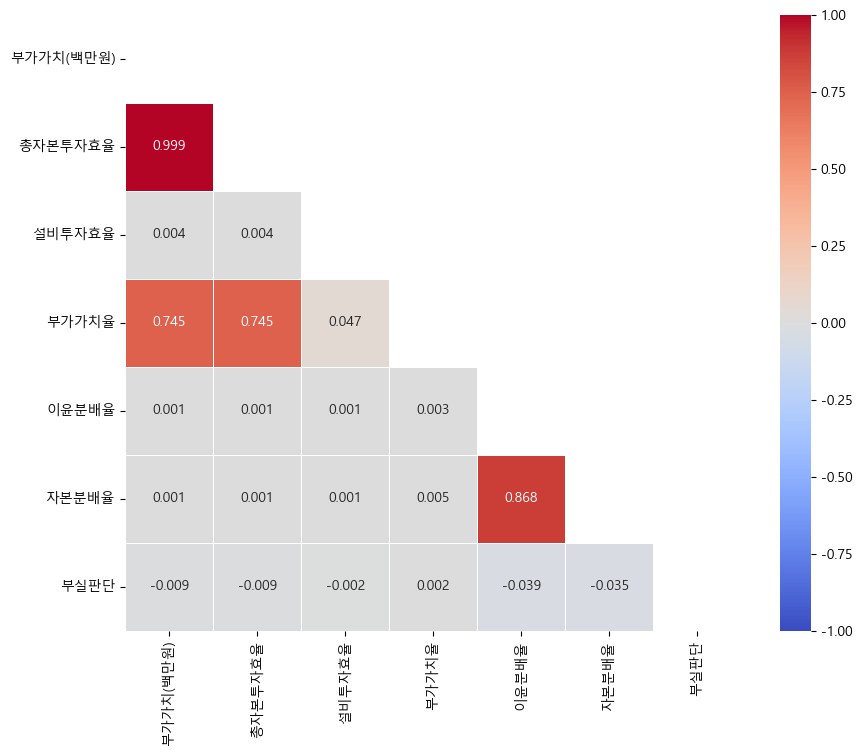

In [96]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(productivity_ft1.corr(), dtype=bool))
sns.heatmap(productivity_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask)

In [97]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(productivity_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
부가가치(백만원)-총자본투자효율: 0.999
부가가치(백만원)-설비투자효율: 0.004
부가가치(백만원)-부가가치율: 0.745
부가가치(백만원)-이윤분배율: 0.001
부가가치(백만원)-자본분배율: 0.001
부가가치(백만원)-부실판단: -0.009
총자본투자효율-설비투자효율: 0.004
총자본투자효율-부가가치율: 0.745
총자본투자효율-이윤분배율: 0.001
총자본투자효율-자본분배율: 0.001
총자본투자효율-부실판단: -0.009
설비투자효율-부가가치율: 0.047
설비투자효율-이윤분배율: 0.001
설비투자효율-자본분배율: 0.001
설비투자효율-부실판단: -0.002
부가가치율-이윤분배율: 0.003
부가가치율-자본분배율: 0.005
부가가치율-부실판단: 0.002
이윤분배율-자본분배율: 0.868
이윤분배율-부실판단: -0.039
자본분배율-부실판단: -0.035
p-value======================
부가가치(백만원)-총자본투자효율: 0.000
부가가치(백만원)-설비투자효율: 0.546
부가가치(백만원)-부가가치율: 0.000
부가가치(백만원)-이윤분배율: 0.899
부가가치(백만원)-자본분배율: 0.918
부가가치(백만원)-부실판단: 0.175
총자본투자효율-설비투자효율: 0.576
총자본투자효율-부가가치율: 0.000
총자본투자효율-이윤분배율: 0.910
총자본투자효율-자본분배율: 0.942
총자본투자효율-부실판단: 0.205
설비투자효율-부가가치율: 0.000
설비투자효율-이윤분배율: 0.880
설비투자효율-자본분배율: 0.858
설비투자효율-부실판단: 0.726
부가가치율-이윤분배율: 0.625
부가가치율-자본분배율: 0.469
부가가치율-부실판단: 0.808
이윤분배율-자본분배율: 0.000
이윤분배율-부실판단: 0.000
자본분배율-부실판단: 0.000


In [98]:
np.abs(productivity_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단        1.000
이윤분배율       0.039
자본분배율       0.035
부가가치(백만원)   0.009
총자본투자효율     0.009
설비투자효율      0.002
부가가치율       0.002
Name: 부실판단, dtype: float64

6활동성

<Axes: >

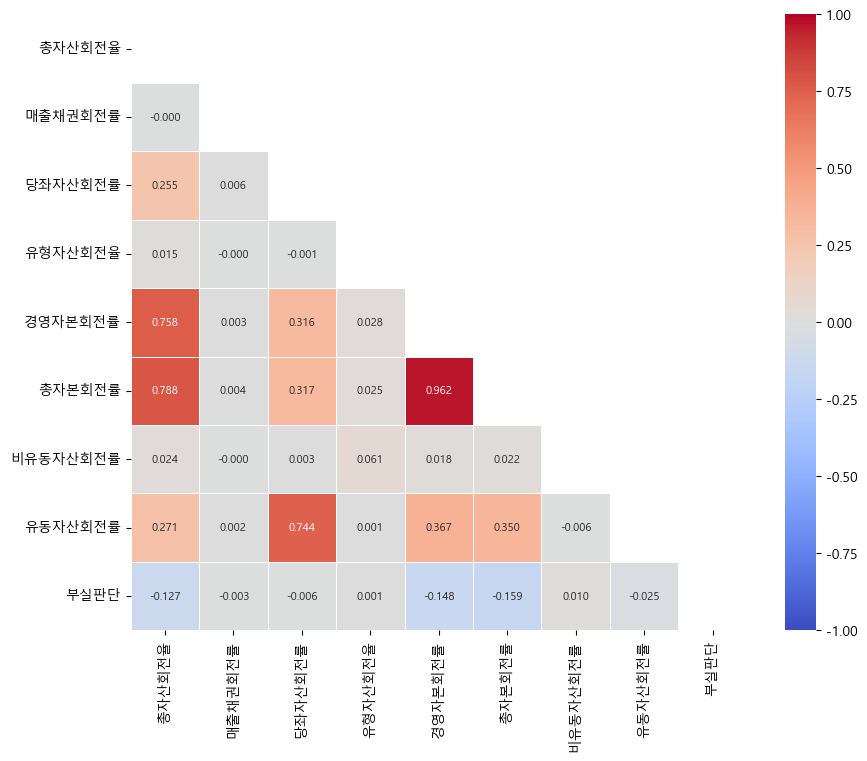

In [99]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(activity_ft1.corr(), dtype=bool))
sns.heatmap(activity_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 8}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask)

In [100]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(activity_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
총자산회전율-매출채권회전률: -0.000
총자산회전율-당좌자산회전률: 0.255
총자산회전율-유형자산회전율: 0.015
총자산회전율-경영자본회전률: 0.758
총자산회전율-총자본회전률: 0.788
총자산회전율-비유동자산회전률: 0.024
총자산회전율-유동자산회전률: 0.271
총자산회전율-부실판단: -0.127
매출채권회전률-당좌자산회전률: 0.006
매출채권회전률-유형자산회전율: -0.000
매출채권회전률-경영자본회전률: 0.003
매출채권회전률-총자본회전률: 0.004
매출채권회전률-비유동자산회전률: -0.000
매출채권회전률-유동자산회전률: 0.002
매출채권회전률-부실판단: -0.003
당좌자산회전률-유형자산회전율: -0.001
당좌자산회전률-경영자본회전률: 0.316
당좌자산회전률-총자본회전률: 0.317
당좌자산회전률-비유동자산회전률: 0.003
당좌자산회전률-유동자산회전률: 0.744
당좌자산회전률-부실판단: -0.006
유형자산회전율-경영자본회전률: 0.028
유형자산회전율-총자본회전률: 0.025
유형자산회전율-비유동자산회전률: 0.061
유형자산회전율-유동자산회전률: 0.001
유형자산회전율-부실판단: 0.001
경영자본회전률-총자본회전률: 0.962
경영자본회전률-비유동자산회전률: 0.018
경영자본회전률-유동자산회전률: 0.367
경영자본회전률-부실판단: -0.148
총자본회전률-비유동자산회전률: 0.022
총자본회전률-유동자산회전률: 0.350
총자본회전률-부실판단: -0.159
비유동자산회전률-유동자산회전률: -0.006
비유동자산회전률-부실판단: 0.010
유동자산회전률-부실판단: -0.025
p-value======================
총자산회전율-매출채권회전률: 0.964
총자산회전율-당좌자산회전률: 0.000
총자산회전율-유형자산회전율: 0.036
총자산회전율-경영자본회전률: 0.000
총자산회전율-총자본회전률: 0.000
총자산회전율-비유동자산회전률: 0.000
총자산

In [101]:
np.abs(activity_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단       1.000
총자본회전률     0.159
경영자본회전률    0.148
총자산회전율     0.127
유동자산회전률    0.025
비유동자산회전률   0.010
당좌자산회전률    0.006
매출채권회전률    0.003
유형자산회전율    0.001
Name: 부실판단, dtype: float64

7기타

<Axes: >

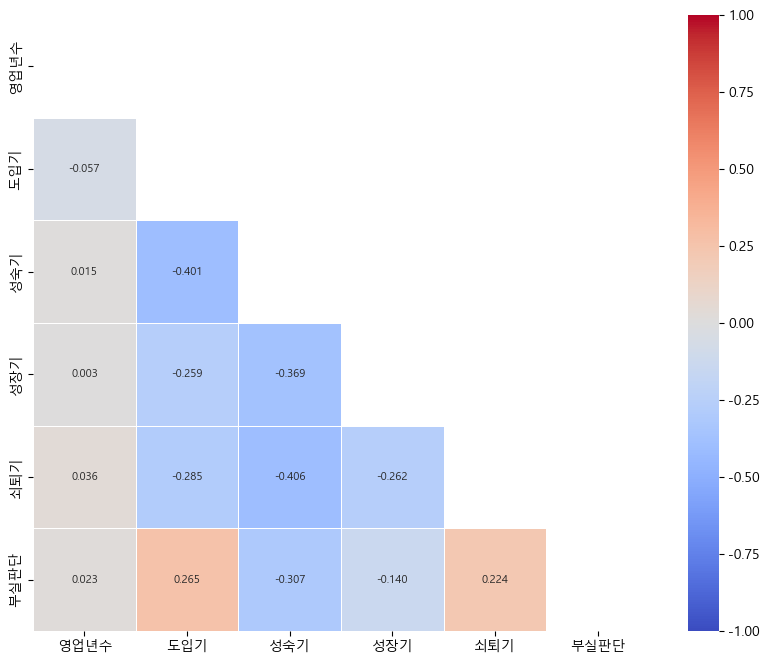

In [102]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(etc_ft1.corr(), dtype=bool))
sns.heatmap(etc_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 8}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask
)

In [103]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(etc_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
영업년수-도입기: -0.057
영업년수-성숙기: 0.015
영업년수-성장기: 0.003
영업년수-쇠퇴기: 0.036
영업년수-부실판단: 0.023
도입기-성숙기: -0.401
도입기-성장기: -0.259
도입기-쇠퇴기: -0.285
도입기-부실판단: 0.265
성숙기-성장기: -0.369
성숙기-쇠퇴기: -0.406
성숙기-부실판단: -0.307
성장기-쇠퇴기: -0.262
성장기-부실판단: -0.140
쇠퇴기-부실판단: 0.224
p-value======================
영업년수-도입기: 0.000
영업년수-성숙기: 0.027
영업년수-성장기: 0.659
영업년수-쇠퇴기: 0.000
영업년수-부실판단: 0.001
도입기-성숙기: 0.000
도입기-성장기: 0.000
도입기-쇠퇴기: 0.000
도입기-부실판단: 0.000
성숙기-성장기: 0.000
성숙기-쇠퇴기: 0.000
성숙기-부실판단: 0.000
성장기-쇠퇴기: 0.000
성장기-부실판단: 0.000
쇠퇴기-부실판단: 0.000


In [113]:
np.abs(etc_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단   1.000
성숙기    0.307
도입기    0.265
쇠퇴기    0.224
성장기    0.140
영업년수   0.023
Name: 부실판단, dtype: float64

전체

In [109]:
features2 = features.drop(features[growth_ft1['총자산증가율'] == np.inf].index, axis=0)

<Axes: >

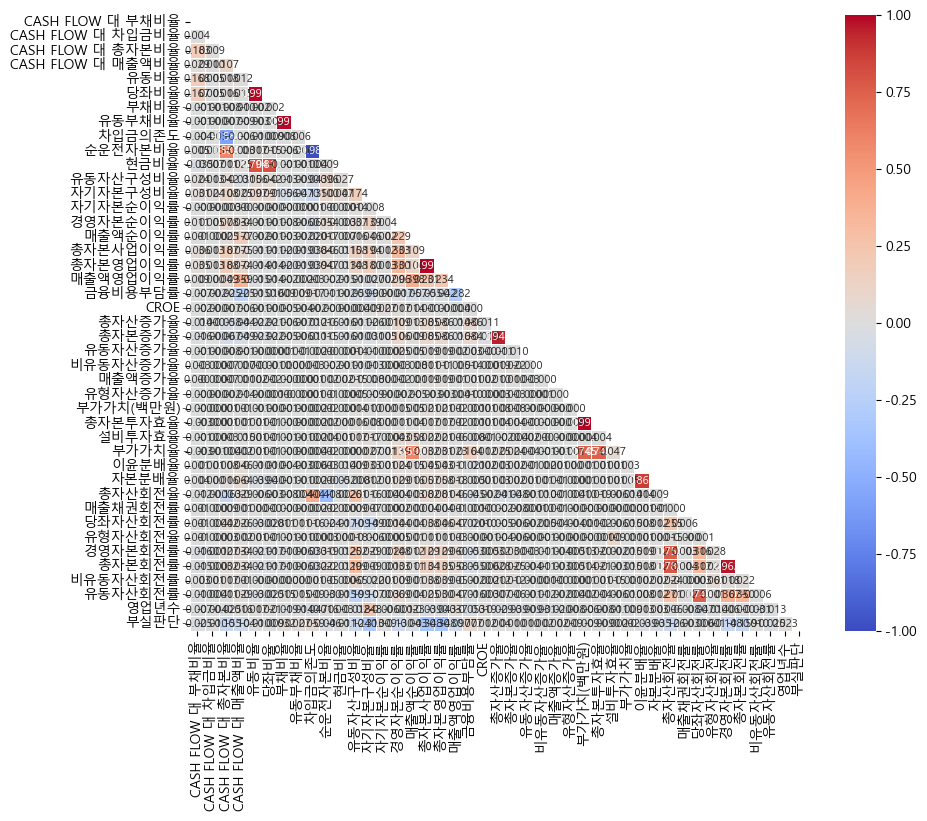

In [110]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(features2.corr(), dtype=bool))
sns.heatmap(features2.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 8}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask
)

In [111]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(features2)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
CASH FLOW 대 부채비율-CASH FLOW 대 차입금비율: 0.004
CASH FLOW 대 부채비율-CASH FLOW 대 총자본비율: 0.183
CASH FLOW 대 부채비율-CASH FLOW 대 매출액비율: 0.029
CASH FLOW 대 부채비율-유동비율: 0.168
CASH FLOW 대 부채비율-당좌비율: 0.167
CASH FLOW 대 부채비율-부채비율: -0.001
CASH FLOW 대 부채비율-유동부채비율: -0.001
CASH FLOW 대 부채비율-차입금의존도: -0.004
CASH FLOW 대 부채비율-순운전자본비율: 0.005
CASH FLOW 대 부채비율-현금비율: -0.035
CASH FLOW 대 부채비율-유동자산구성비율: 0.024
CASH FLOW 대 부채비율-자기자본구성비율: 0.031
CASH FLOW 대 부채비율-자기자본순이익률: -0.000
CASH FLOW 대 부채비율-경영자본순이익률: 0.011
CASH FLOW 대 부채비율-매출액순이익률: 0.001
CASH FLOW 대 부채비율-총자본사업이익률: 0.036
CASH FLOW 대 부채비율-총자본영업이익률: 0.035
CASH FLOW 대 부채비율-매출액영업이익률: 0.009
CASH FLOW 대 부채비율-금융비용부담률: -0.007
CASH FLOW 대 부채비율-CROE: -0.002
CASH FLOW 대 부채비율-총자산증가율: -0.014
CASH FLOW 대 부채비율-총자본증가율: -0.016
CASH FLOW 대 부채비율-유동자산증가율: -0.001
CASH FLOW 대 부채비율-비유동자산증가율: 0.003
CASH FLOW 대 부채비율-매출액증가율: 0.000
CASH FLOW 대 부채비율-유형자산증가율: -0.000
CASH FLOW 대 부채비율-부가가치(백만원): -0.000
CASH FLOW 대 부채비율-총자본투자효율: -0.003
CASH FLOW 대 부채비율-설비투자효율: -0.001
CASH FLOW 대

In [114]:
np.abs(features2.corr()['부실판단']).sort_values(ascending=False)

부실판단                1.000
총자본영업이익률            0.348
총자본사업이익률            0.348
자기자본구성비율            0.313
총자본회전률              0.159
CASH FLOW 대 총자본비율   0.155
경영자본회전률             0.148
경영자본순이익률            0.130
총자산회전율              0.126
유동자산구성비율            0.124
CASH FLOW 대 매출액비율   0.104
매출액영업이익률            0.097
금융비용부담률             0.077
차입금의존도              0.059
순운전자본비율             0.046
매출액순이익률             0.043
이윤분배율               0.039
자본분배율               0.035
부채비율                0.032
유동부채비율              0.027
유동자산회전률             0.025
CASH FLOW 대 부채비율    0.025
영업년수                0.023
CROE                0.012
현금비율                0.011
CASH FLOW 대 차입금비율   0.010
유동자산증가율             0.010
비유동자산회전률            0.010
총자본증가율              0.010
유동비율                0.010
유형자산증가율             0.009
부가가치(백만원)           0.009
총자본투자효율             0.009
자기자본순이익률            0.009
당좌비율                0.009
당좌자산회전률             0.006
총자산증가율              0.004
매출채권회전률             0.003
설비투자효율      